# Analyzing Team and players Ipswich Town

## 1. Importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import re


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\adamb\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

## 2. Extract Team Data

### 2.a Team grouped stats

In [3]:
# Set the URL of the Ipswich team's Understat page 
link = "https://understat.com/team/Ipswich/2024"

# Send an HTTP GET request to this URL and store the response
res = requests.get(link)

# Parsing the HTML content of the page with BeautifulSoup using the ‘lxml’ parser
soup = BeautifulSoup(res.content, 'lxml')

# Retrieve all <script> elements present in the page (as a list)
scripts = soup.find_all('script')

# Extraire le contenu (code JavaScript) du deuxième <script> trouvé (index 1), 
# qui contient les données statistiques groupées du joueur
strings = scripts[2].string

In [4]:
# Trouver l'indice de début de la chaîne JSON : le texte commence juste après "('"
ind_start = strings.index("('") + 2

# Trouver l'indice de fin de la chaîne JSON : juste avant "')"
ind_end = strings.index("')")

# Extraire uniquement la sous-chaîne contenant les données JSON entre les deux indices
json_data = strings[ind_start:ind_end]

# Corriger l'encodage de la chaîne JSON : d'abord encoder en UTF-8, puis décoder les séquences échappées (ex : \u0026 → &)
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convertir la chaîne JSON en un objet Python (liste ou dictionnaire)
data = json.loads(json_data)


In [13]:
json_data

'{"situation":{"OpenPlay":{"shots":242,"goals":29,"xG":29.709404417313635349273681640625,"against":{"shots":446,"goals":57,"xG":65.948429054580628871917724609375}},"FromCorner":{"shots":65,"goals":4,"xG":5.71926231123507022857666015625,"against":{"shots":104,"goals":11,"xG":10.322146014310419559478759765625}},"SetPiece":{"shots":24,"goals":0,"xG":1.9344337619841098785400390625,"against":{"shots":22,"goals":3,"xG":4.734545036219060420989990234375}},"DirectFreekick":{"shots":10,"goals":0,"xG":0.694817245006561279296875,"against":{"shots":14,"goals":0,"xG":1.193726070225238800048828125}},"Penalty":{"shots":2,"goals":2,"xG":1.5223376750946044921875,"against":{"shots":6,"goals":6,"xG":4.5670130252838134765625}}},"formation":{"4-2-3-1":{"stat":"4-2-3-1","time":2746,"shots":305,"goals":28,"xG":34.98090623132884502410888671875,"against":{"shots":454,"goals":52,"xG":63.533178099431097507476806640625}},"5-4-1":{"stat":"5-4-1","time":378,"shots":18,"goals":3,"xG":2.749035854823887348175048828125,

In [38]:
data

{'situation': {'OpenPlay': {'shots': 242,
   'goals': 29,
   'xG': 29.709404417313635,
   'against': {'shots': 446, 'goals': 57, 'xG': 65.94842905458063}},
  'FromCorner': {'shots': 65,
   'goals': 4,
   'xG': 5.71926231123507,
   'against': {'shots': 104, 'goals': 11, 'xG': 10.32214601431042}},
  'SetPiece': {'shots': 24,
   'goals': 0,
   'xG': 1.9344337619841099,
   'against': {'shots': 22, 'goals': 3, 'xG': 4.73454503621906}},
  'DirectFreekick': {'shots': 10,
   'goals': 0,
   'xG': 0.6948172450065613,
   'against': {'shots': 14, 'goals': 0, 'xG': 1.1937260702252388}},
  'Penalty': {'shots': 2,
   'goals': 2,
   'xG': 1.5223376750946045,
   'against': {'shots': 6, 'goals': 6, 'xG': 4.5670130252838135}}},
 'formation': {'4-2-3-1': {'stat': '4-2-3-1',
   'time': 2746,
   'shots': 305,
   'goals': 28,
   'xG': 34.980906231328845,
   'against': {'shots': 454, 'goals': 52, 'xG': 63.5331780994311}},
  '5-4-1': {'stat': '5-4-1',
   'time': 378,
   'shots': 18,
   'goals': 3,
   'xG': 2.7

In [5]:
import pandas as pd

# Fonction générique pour aplatir les sous-dictionnaires (avec clé 'against'), On crée une fonction appelée flatten_section, 
# qui prend en entrée un sous-dictionnaire de data (comme data['formation'], data['situation'], etc.)
def flatten_section(section_data):
    
    # On initialise une liste vide où chaque élément sera un dictionnaire représentant une ligne du futur DataFrame
    flat_data = [] 
    
    # On boucle sur chaque clé (ex. '4-2-3-1') et chaque valeur (dictionnaire de stats)
    for key, values in section_data.items():
        row = {
            'stat': values.get('stat', key),  # Utilise 'stat' s'il existe, sinon la clé
            'shots': values.get('shots'),
            'goals': values.get('goals'),
            'xG': values.get('xG')
        }

        # Certains blocs ont un sous-dictionnaire "against" contenant les stats adverses. Si présent, on les ajoute à la ligne 
        # avec les noms : Si présence du bloc 'against', on ajoute les colonnes correspondantes
        if 'against' in values:
            row.update({
                'shotsA': values['against'].get('shots'),
                'goalsA': values['against'].get('goals'),
                'xGA': values['against'].get('xG')
            })

        # Facultatif : ajoute d'autres champs comme 'time' s'ils existent
        if 'time' in values:
            row['time'] = values['time']

        flat_data.append(row)

    return pd.DataFrame(flat_data)


# Sections à convertir
sections = {
    'situation': 'df_situation',
    'formation': 'df_formation',
    'gameState': 'df_game_state',
    'timing': 'df_timing',
    'shotZone': 'df_shot_zone',
    'attackSpeed': 'df_attack_speed',
    'result': 'df_result'
}

# Dictionnaire final avec les DataFrames propres
dfs = {}

for key, df_name in sections.items():
    dfs[df_name] = flatten_section(data[key])

# ✅ Exemple : affichage du DataFrame formation propre
print(dfs['df_shot_zone'])


              stat  shots  goals         xG  shotsA  goalsA        xGA
0         ownGoals      1      1   1.000000       3       3   3.000000
1    shotOboxTotal    143      7   5.141475     184       7   6.917250
2  shotPenaltyArea    189     21  24.488752     354      51  51.454300
3   shotSixYardBox     30      6  10.325260      60      18  26.182853


we store each data sub-section in its own dataframe to obtain complete team data by section

In [10]:
df_situation = dfs['df_situation']
df_formation = dfs['df_formation']
df_gameState = dfs['df_game_state']
df_timing = dfs['df_timing']
df_shotZone = dfs['df_shot_zone']
df_attackSpeed = dfs['df_attack_speed']
df_result = dfs['df_result']
df_shotZone


,stat,shots,goals,xG,shotsA,goalsA,xGA
0,ownGoals,1,1,1.000000,3,3,3.000000
1,shotOboxTotal,143,7,5.141475,184,7,6.917250
2,shotPenaltyArea,189,21,24.488752,354,51,51.454300
3,shotSixYardBox,30,6,10.325260,60,18,26.182853


We transform the data dictionnary into DataFrame and we extract the columns name

In [25]:
# Convertir tous les dictionnaires de la ligne 'against' en DataFrame
against_df = pd.DataFrame(df_stat_season.loc['against'].tolist(), index=df_stat_season.columns)
against_df


,shots,goals,xG
OpenPlay,446,57,65.948429
FromCorner,104,11,10.322146
SetPiece,22,3,4.734545
DirectFreekick,14,0,1.193726
Penalty,6,6,4.567013


## 3. Getting all players stats

We can take an example with La Liga to extract all player's stats

In [35]:
# Entering the team's link
link = "https://understat.com/team/Ipswich/2024"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the players stats 
strings = scripts[3].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data_players = json.loads(json_data)
# Creating the dataframe
df_statsPlayers = pd.DataFrame(data_players)
df_statsPlayers

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8868,Liam Delap,35,2635,12,11.887603644281626,2,2.784454360604286,67,20,10,0,F S,Ipswich,10,10.365265969187021,14.66363612189889,3.1533351335674524
1,12752,Sammie Szmodics,19,1015,4,4.5141482055187225,0,0.1510741114616394,21,4,2,0,M S,Ipswich,4,4.5141482055187225,5.326153449714184,0.7284961454570293
2,8563,George Hirst,24,465,3,2.3920131660997868,1,0.403658552095294,12,4,3,0,F S,Ipswich,3,2.3920131660997868,3.8754144329577684,1.2429697029292583
3,10348,Omari Hutchinson,29,2440,3,2.849347935989499,2,3.193762445822358,38,28,5,0,M S,Ipswich,3,2.849347935989499,9.365900002419949,4.2413630383089185
4,9415,Jaden Philogene-Bidace,10,478,2,2.196989931166172,0,0.2442980818450451,12,5,1,0,D M S,Ipswich,2,2.196989931166172,1.3359068632125854,0.21263843216001987
5,11058,Julio Enciso,12,820,2,1.5856521427631378,3,1.7976057473570108,28,11,3,0,M S,Ipswich,2,1.5856521427631378,3.65138278901577,1.4532760037109256
6,6424,Ben Johnson,23,1327,1,1.4644898548722267,2,2.1658401750028133,7,11,3,1,D M S,Ipswich,1,1.4644898548722267,4.204577220603824,1.2919913660734892
7,8919,Leif Davis,31,2580,1,0.6881393082439899,2,5.6273408979177475,14,54,5,1,D S,Ipswich,1,0.6881393082439899,6.7909457720816135,3.728818092495203
8,9406,Nathan Broadhead,16,579,1,1.6443205047398806,0,0.7821710780262947,10,6,1,0,M S,Ipswich,1,1.6443205047398806,3.9918433018028736,2.159004925750196
9,10301,Jens Cajuste,28,1867,1,0.47253451868891716,0,0.48834408819675446,10,11,2,0,M S,Ipswich,1,0.47253451868891716,5.342082850635052,4.567311733961105


## 4. Vizualisation

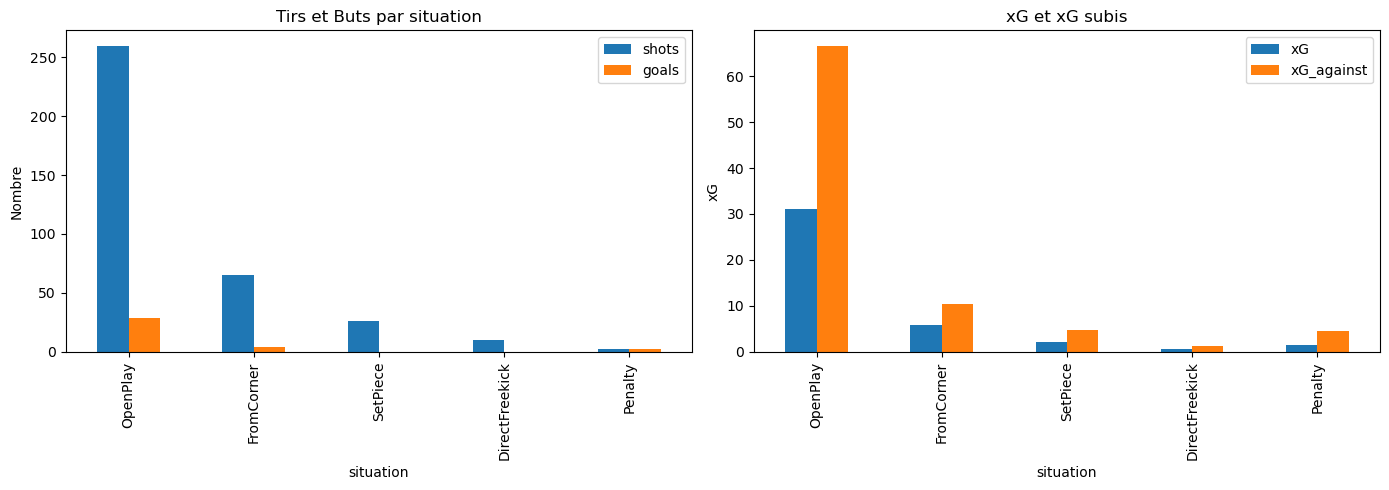

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df_situation = pd.DataFrame(data['situation']).T.reset_index().rename(columns={'index': 'situation'})
df_situation[['shots_against', 'goals_against', 'xG_against']] = df_situation['against'].apply(pd.Series)
df_situation.drop(columns='against', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Tirs et buts
df_situation.plot(x='situation', y=['shots', 'goals'], kind='bar', ax=ax[0], title='Tirs et Buts par situation')
ax[0].set_ylabel("Nombre")

# xG
df_situation.plot(x='situation', y=['xG', 'xG_against'], kind='bar', ax=ax[1], title='xG et xG subis')
ax[1].set_ylabel("xG")

plt.tight_layout()
plt.show()



In [12]:
df_formation = pd.DataFrame(data['formation']).T.reset_index().rename(columns={'index': 'formation'})
df_formation[['shots_against', 'goals_against', 'xG_against']] = df_formation['against'].apply(pd.Series)
df_formation.drop(columns='against', inplace=True)


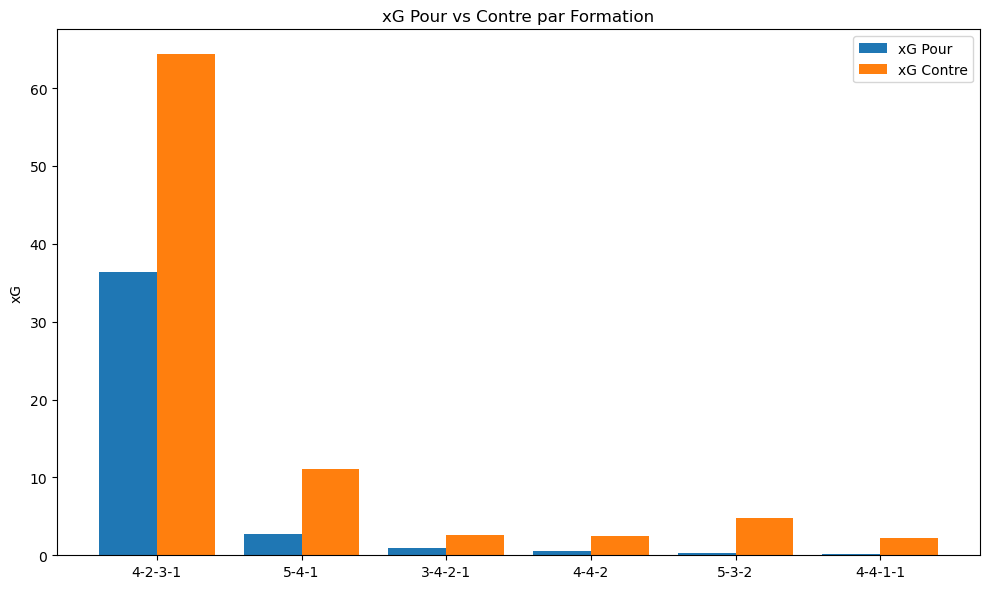

In [13]:
plt.figure(figsize=(10,6))
df_formation_sorted = df_formation.sort_values(by='xG', ascending=False)

bar_width = 0.4
positions = range(len(df_formation_sorted))

plt.bar(positions, df_formation_sorted['xG'], width=bar_width, label='xG Pour')
plt.bar([p + bar_width for p in positions], df_formation_sorted['xG_against'], width=bar_width, label='xG Contre')

plt.xticks([p + bar_width / 2 for p in positions], df_formation_sorted['formation'])
plt.title("xG Pour vs Contre par Formation")
plt.ylabel("xG")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
df_timing = pd.DataFrame(data['timing']).T.reset_index().rename(columns={'index': 'period'})
df_timing[['shots_against', 'goals_against', 'xG_against']] = df_timing['against'].apply(pd.Series)
df_timing.drop(columns='against', inplace=True)


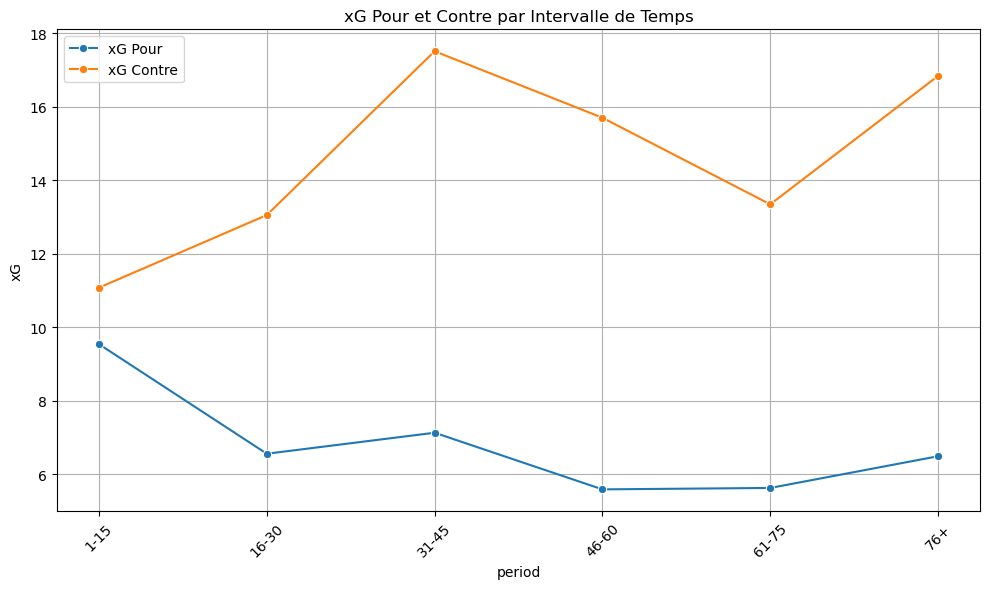

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_timing, x='period', y='xG', label='xG Pour', marker='o')
sns.lineplot(data=df_timing, x='period', y='xG_against', label='xG Contre', marker='o')
plt.title('xG Pour et Contre par Intervalle de Temps')
plt.ylabel('xG')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
df_zone = pd.DataFrame(data['shotZone']).T.reset_index().rename(columns={'index': 'zone'})
df_zone[['shots_against', 'goals_against', 'xG_against']] = df_zone['against'].apply(pd.Series)
df_zone.drop(columns='against', inplace=True)


<Figure size 1000x600 with 0 Axes>

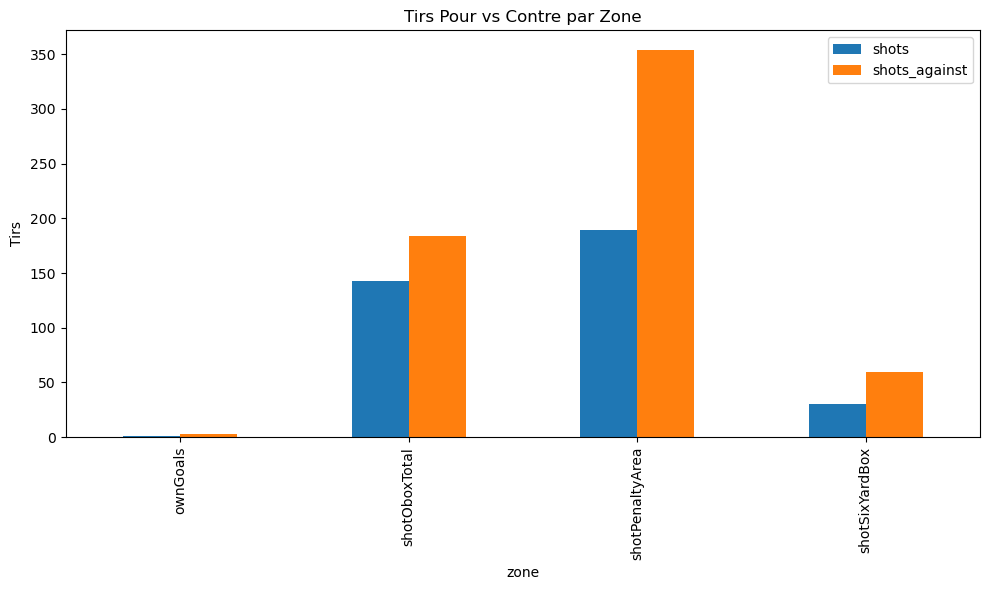

In [17]:
plt.figure(figsize=(10,6))
df_zone.plot(x='zone', y=['shots', 'shots_against'], kind='bar', figsize=(10,6))
plt.title("Tirs Pour vs Contre par Zone")
plt.ylabel("Tirs")
plt.tight_layout()
plt.show()
